In [1]:
import numpy as np
import pandas as pd
import textstat
import nltk
import re
from scipy.stats import bootstrap
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
news_df = pd.read_pickle('News_df.pkl')
news_df.reset_index(drop = True, inplace = True)
news_df.head()

,text,real,subject,title,date
0,Donald Trump just couldn t wish all Americans ...,0,None,None,None
1,House Intelligence Committee Chairman Devin Nu...,0,None,None,None
2,"On Friday, it was revealed that former Milwauk...",0,None,None,None
3,Pope Francis used his annual Christmas Day mes...,0,None,None,None
4,The number of cases of cops brutalizing and ki...,0,None,None,None


In [3]:
'''
Most English language readability scores avaliabe in textstat were used. One exception was SMOG, which requires more content 
than many of the articles had. 
'''

'\nMost English language readability scores avaliabe in textstat were used. One exception was SMOG, which requires more content \nthan many of the articles had. \n'

In [4]:
sc_scorers = [
    textstat.flesch_reading_ease, 
    textstat.flesch_kincaid_grade,
    textstat.coleman_liau_index,
    textstat.automated_readability_index,
    textstat.dale_chall_readability_score,
    textstat.difficult_words,
    textstat.linsear_write_formula,
    textstat.gunning_fog, 
    textstat.text_standard,
    textstat.syllable_count,
    textstat.lexicon_count,
    textstat.sentence_count,
    textstat.char_count,
    textstat.letter_count,
    textstat.polysyllabcount,
    textstat.monosyllabcount
    ]
len(sc_scorers)

16

In [5]:
column_names = [
    'fe_score', 
    'fk_score',
    'cl_score',
    'ari_score',
    'dc_score',
    'dw_score',
    'ls_score',
    'gf_score',
    'std_score',
    'syllable_count',
    'word_count',
    'sentence_count',
    'char_count',
    'letter_count',
    'polysyllab_count',
    'monosyllab_count'
    ]
len(column_names)

16

In [6]:
def newsscore(scorer, column_name):
    x = len(news_df)
    sclist = []
    for i in range(x):
            scvar = scorer(news_df['text'][i])
            sclist.append(scvar)
    news_df[column_name] = sclist


In [7]:
start_time = time.time()
y = len(column_names)
for i in range(y):
    newsscore(sc_scorers[i], column_names[i])
print("--- %s seconds ---" % (time.time() - start_time))

--- 2772.5697424411774 seconds ---


In [8]:
news_df.head(2)

,text,real,subject,title,date,fe_score,fk_score,cl_score,ari_score,dc_score,...,ls_score,gf_score,std_score,syllable_count,word_count,sentence_count,char_count,letter_count,polysyllab_count,monosyllab_count
0,Donald Trump just couldn t wish all Americans ...,0,None,None,None,71.14,7.6,9.05,9.8,8.20,...,11.8,8.91,8th and 9th grade,692,492,29,2378,2257,59,362
1,House Intelligence Committee Chairman Devin Nu...,0,None,None,None,62.78,8.7,11.95,11.6,9.86,...,12.4,9.91,11th and 12th grade,471,305,18,1590,1551,39,193


In [9]:
news_df['clean_text'] = news_df['text'].str.replace('[^a-zA-Z]',' ').str.lower()
news_df.head(2)

C:\Users\danie\AppData\Local\Temp\ipykernel_7600\2674937759.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_text'] = news_df['text'].str.replace('[^a-zA-Z]',' ').str.lower()


,text,real,subject,title,date,fe_score,fk_score,cl_score,ari_score,dc_score,...,gf_score,std_score,syllable_count,word_count,sentence_count,char_count,letter_count,polysyllab_count,monosyllab_count,clean_text
0,Donald Trump just couldn t wish all Americans ...,0,None,None,None,71.14,7.6,9.05,9.8,8.20,...,8.91,8th and 9th grade,692,492,29,2378,2257,59,362,donald trump just couldn t wish all americans ...
1,House Intelligence Committee Chairman Devin Nu...,0,None,None,None,62.78,8.7,11.95,11.6,9.86,...,9.91,11th and 12th grade,471,305,18,1590,1551,39,193,house intelligence committee chairman devin nu...


In [10]:
'''std_score is originally a string, I am converting the score into a number for ML purposes'''

'std_score is originally a string, I am converting the score into a number for ML purposes'

In [11]:
x = len(news_df['std_score'])
num_list = []
for i in range(x):
    num = re.findall(r'\d+', news_df['std_score'][i])
    num_list.append(num)
len(num_list)

128930

In [12]:
fin_list = []
for i in num_list:
    x = int(i[0])
    y = int(i[1])
    fin = (x+y)/2
    fin_list.append(fin)
len(fin_list)

128930

In [13]:
news_df['std_score_num'] = fin_list
news_df.head(2)

,text,real,subject,title,date,fe_score,fk_score,cl_score,ari_score,dc_score,...,std_score,syllable_count,word_count,sentence_count,char_count,letter_count,polysyllab_count,monosyllab_count,clean_text,std_score_num
0,Donald Trump just couldn t wish all Americans ...,0,None,None,None,71.14,7.6,9.05,9.8,8.20,...,8th and 9th grade,692,492,29,2378,2257,59,362,donald trump just couldn t wish all americans ...,8.5
1,House Intelligence Committee Chairman Devin Nu...,0,None,None,None,62.78,8.7,11.95,11.6,9.86,...,11th and 12th grade,471,305,18,1590,1551,39,193,house intelligence committee chairman devin nu...,11.5


In [14]:
rslt_df1 = news_df[news_df['real'] == 1]
rslt_df1['std_score_num'].describe()

count    56363.000000
mean        11.821310
std          2.436246
min          0.500000
25%         10.500000
50%         11.500000
75%         13.500000
max         67.500000
Name: std_score_num, dtype: float64

In [15]:
rslt_df1['word_count'].describe()

count    56363.000000
mean       474.350762
std        477.113800
min          0.000000
25%        166.000000
50%        375.000000
75%        628.000000
max      14432.000000
Name: word_count, dtype: float64

In [16]:
rslt_wrd = news_df[news_df['word_count'] == 0]
rslt_wrd.head(2)

,text,real,subject,title,date,fe_score,fk_score,cl_score,ari_score,dc_score,...,std_score,syllable_count,word_count,sentence_count,char_count,letter_count,polysyllab_count,monosyllab_count,clean_text,std_score_num
30220,🙂,0,None,None,None,206.84,-15.7,-15.81,0.0,0.0,...,-1th and 0th grade,0,0,1,1,0,0,0,,0.5
93002,,1,politicsNews,Graphic: Supreme Court roundup,"June 16, 2016",206.84,-15.7,-15.81,0.0,0.0,...,-1th and 0th grade,0,0,1,0,0,0,0,,0.5


In [17]:
news_df = news_df[news_df['word_count'] != 0]

news_df['word_count'].describe()

count    128298.000000
mean        431.300963
std         527.336972
min           1.000000
25%         122.000000
50%         339.000000
75%         539.000000
max       24135.000000
Name: word_count, dtype: float64

In [18]:
'''low_wrd = news_df[news_df['word_count']<40]
z = len(low_wrd)
low_wrd.reset_index(inplace = True, drop = True)
for i in range(z):
    print(low_wrd['text'][i])'''

"low_wrd = news_df[news_df['word_count']<40]\nz = len(low_wrd)\nlow_wrd.reset_index(inplace = True, drop = True)\nfor i in range(z):\n    print(low_wrd['text'][i])"

In [19]:
'''
The above code that is commented out was ran. And articles under 40 words are to be removed as teh vast majority were not usable
Also I found that duplicates need to be re-evaluated. 
'''

'\nThe above code that is commented out was ran. And articles under 40 words are to be removed as teh vast majority were not usable\nAlso I found that duplicates need to be re-evaluated. \n'

In [20]:
news_df = news_df[news_df['word_count']>40]

In [21]:
news_df.head(2)

,text,real,subject,title,date,fe_score,fk_score,cl_score,ari_score,dc_score,...,std_score,syllable_count,word_count,sentence_count,char_count,letter_count,polysyllab_count,monosyllab_count,clean_text,std_score_num
0,Donald Trump just couldn t wish all Americans ...,0,None,None,None,71.14,7.6,9.05,9.8,8.20,...,8th and 9th grade,692,492,29,2378,2257,59,362,donald trump just couldn t wish all americans ...,8.5
1,House Intelligence Committee Chairman Devin Nu...,0,None,None,None,62.78,8.7,11.95,11.6,9.86,...,11th and 12th grade,471,305,18,1590,1551,39,193,house intelligence committee chairman devin nu...,11.5


In [22]:
'''low_wrd2 = News_df[News_df['word_count']<60]
z = len(low_wrd2)
low_wrd2.reset_index(inplace = True, drop = True)
for i in range(z):
    print(low_wrd2['text'][i])'''

"low_wrd2 = News_df[News_df['word_count']<60]\nz = len(low_wrd2)\nlow_wrd2.reset_index(inplace = True, drop = True)\nfor i in range(z):\n    print(low_wrd2['text'][i])"

In [23]:
'''The above code was run to review articles under 60 like I did with under forty. The under forty cutoff seemed reasonable
so I did not change the dataset as a result'''


'The above code was run to review articles under 60 like I did with under forty. The under forty cutoff seemed reasonable\nso I did not change the dataset as a result'

In [24]:
news_df['sentence_count'].min()

1

In [25]:
#news_df[news_df['sentence_count']==1].head(30)

In [26]:
#News_df[News_df['sentence_count']==1].tail(30)

In [27]:
'''
Reviewed the 60 articles from the commented code above. They seemed substantive enough to retain. 
'''

'\nReviewed the 60 articles from the commented code above. They seemed substantive enough to retain. \n'

In [28]:
'''
Based on checks performed it seemed best to remove duplicates based on readability scores/metrics. Otherwise the code would
only catch duplicates which originated from the same data set. 
'''

'\nBased on checks performed it seemed best to remove duplicates based on readability scores/metrics. Otherwise the code would\nonly catch duplicates which originated from the same data set. \n'

In [29]:
news_df = news_df.drop_duplicates(subset=column_names, keep='last').reset_index(drop = True)
news_df.head(2)

,text,real,subject,title,date,fe_score,fk_score,cl_score,ari_score,dc_score,...,std_score,syllable_count,word_count,sentence_count,char_count,letter_count,polysyllab_count,monosyllab_count,clean_text,std_score_num
0,House Dem Aide: We Didn’t Even See Comey’s Let...,0,None,None,None,57.61,10.7,11.02,13.3,8.58,...,11th and 12th grade,1249,815,37,4101,3980,96,516,house dem aide we didn t even see comey s let...,11.5
1,"Why the Truth Might Get You Fired October 29, ...",0,None,None,None,51.68,10.9,11.49,12.5,8.61,...,10th and 11th grade,1938,1246,64,6405,6174,192,826,why the truth might get you fired october ...,10.5


In [30]:
rslt_real = news_df[news_df['real'] == 1]
rslt_real.describe()

,real,fe_score,fk_score,cl_score,ari_score,dc_score,dw_score,ls_score,gf_score,syllable_count,word_count,sentence_count,char_count,letter_count,polysyllab_count,monosyllab_count,std_score_num
count,54893.0,54893.000000,54893.000000,54893.000000,54893.000000,54893.000000,54893.000000,54893.000000,54893.000000,54893.000000,54893.000000,54893.000000,54893.000000,54893.000000,54893.000000,54893.000000,54893.000000
mean,1.0,53.747630,11.175157,11.740365,13.732381,9.645947,93.863662,14.596768,12.655098,738.085166,482.888711,24.146084,2459.287159,2379.130181,65.055289,316.455395,11.831062
std,0.0,10.299887,2.393641,1.677085,2.889202,0.999197,76.120185,4.576024,2.425525,707.370723,478.834466,27.393376,2367.237186,2277.385891,59.925486,329.968581,2.385926
min,1.0,-101.420000,1.400000,-1.160000,0.600000,5.310000,4.000000,2.866667,3.770000,54.000000,41.000000,1.000000,174.000000,164.000000,0.000000,18.000000,0.500000
25%,1.0,47.620000,9.600000,10.680000,11.900000,9.000000,39.000000,11.600000,11.100000,277.000000,180.000000,8.000000,925.000000,899.000000,24.000000,115.000000,10.500000
50%,1.0,53.810000,11.100000,11.780000,13.600000,9.550000,79.000000,14.200000,12.470000,593.000000,381.000000,17.000000,1970.000000,1912.000000,52.000000,239.000000,11.500000
75%,1.0,60.350000,12.500000,12.810000,15.300000,10.180000,125.000000,17.000000,13.920000,981.000000,636.000000,30.000000,3264.000000,3161.000000,87.000000,412.000000,13.500000
max,1.0,96.990000,67.700000,20.080000,89.100000,18.270000,1861.000000,67.000000,68.010000,21342.000000,14432.000000,1108.000000,70677.000000,68102.000000,1706.000000,10619.000000,67.500000


In [31]:
rslt_fake = news_df[news_df['real']==0]
rslt_fake.describe()

,real,fe_score,fk_score,cl_score,ari_score,dc_score,dw_score,ls_score,gf_score,syllable_count,word_count,sentence_count,char_count,letter_count,polysyllab_count,monosyllab_count,std_score_num
count,28511.0,28511.000000,28511.000000,28511.000000,28511.000000,28511.000000,28511.000000,28511.000000,28511.000000,28511.000000,28511.000000,28511.000000,28511.000000,28511.000000,28511.000000,28511.000000,28511.000000
mean,0.0,58.419053,10.298232,11.013080,12.759012,9.275288,88.725053,13.876115,11.780116,756.874890,502.796535,25.107748,2530.849391,2451.138052,64.349058,339.199186,10.876100
std,0.0,13.546282,3.124217,2.897217,4.202223,1.341184,95.060349,5.798748,3.068300,965.911667,650.926481,34.890744,3262.808286,3149.888440,84.182144,454.487615,3.231846
min,0.0,-520.760000,0.000000,-2.770000,0.800000,1.180000,0.000000,2.117647,2.360000,49.000000,41.000000,1.000000,150.000000,147.000000,0.000000,16.000000,0.500000
25%,0.0,51.210000,8.500000,9.570000,10.400000,8.480000,42.000000,10.428571,9.950000,345.000000,232.000000,11.000000,1160.500000,1123.000000,26.000000,155.000000,8.500000
50%,0.0,59.230000,10.000000,10.900000,12.300000,9.060000,67.000000,13.000000,11.420000,557.000000,375.000000,19.000000,1861.000000,1806.000000,45.000000,256.000000,10.500000
75%,0.0,66.470000,11.700000,12.230000,14.500000,9.760000,100.000000,16.250000,13.140000,836.500000,557.000000,29.000000,2788.000000,2705.000000,72.000000,380.000000,12.500000
max,0.0,112.290000,96.300000,256.560000,227.800000,40.060000,1922.000000,75.000000,68.640000,33075.000000,24135.000000,1442.000000,122086.000000,117178.000000,2115.000000,20722.000000,256.500000


C:\Users\danie\AppData\Local\Temp\ipykernel_7600\894368465.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(news_df.corr());


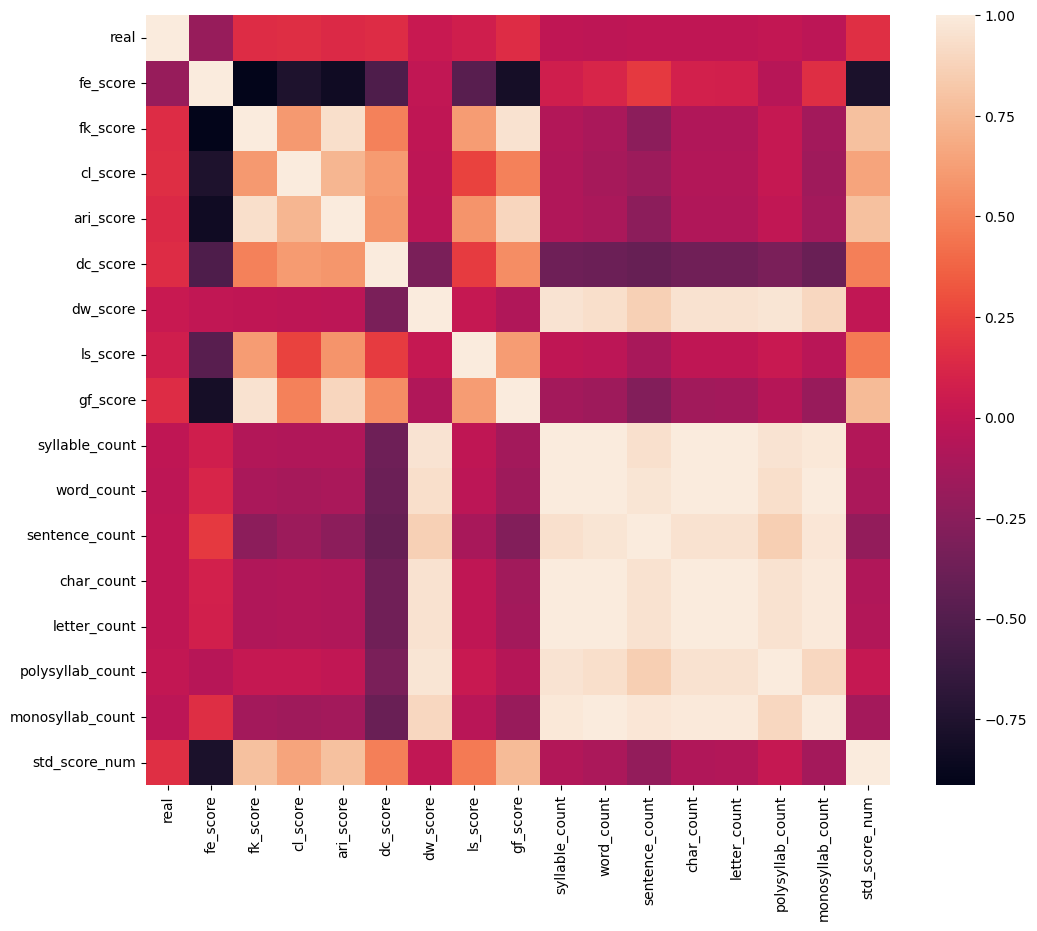

In [32]:
plt.subplots(figsize=(12,10))
sns.heatmap(news_df.corr());

In [33]:
'''
Of the test the Flesch Ease of Reading score seems to be the best predictor of whether an article is real news or not. 
'''

'\nOf the test the Flesch Ease of Reading score seems to be the best predictor of whether an article is real news or not. \n'

In [34]:
'''neg_read = news_df[news_df['fe_score']<0]
neg_read.reset_index(drop = True, inplace = True)
x = len(neg_read)
for i in range(x):
    print(neg_read['clean_text'][i])'''

"neg_read = news_df[news_df['fe_score']<0]\nneg_read.reset_index(drop = True, inplace = True)\nx = len(neg_read)\nfor i in range(x):\n    print(neg_read['clean_text'][i])"

In [35]:
'''I am going to drop these with negative readability scores as well. It appears that the method to obtain the data these articles
were garbled'''

'I am going to drop these with negative readability scores as well. It appears that the method to obtain the data these articles\nwere garbled'

In [36]:
news_df = news_df[news_df['fe_score']>0]
news_df.reset_index(drop = True, inplace = True)

In [37]:
features = [feature for feature in news_df.columns if feature in column_names]

In [38]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'real', data=news_df, alpha=0.5)
        ax.set(xlabel=col, ylabel='fake/real')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

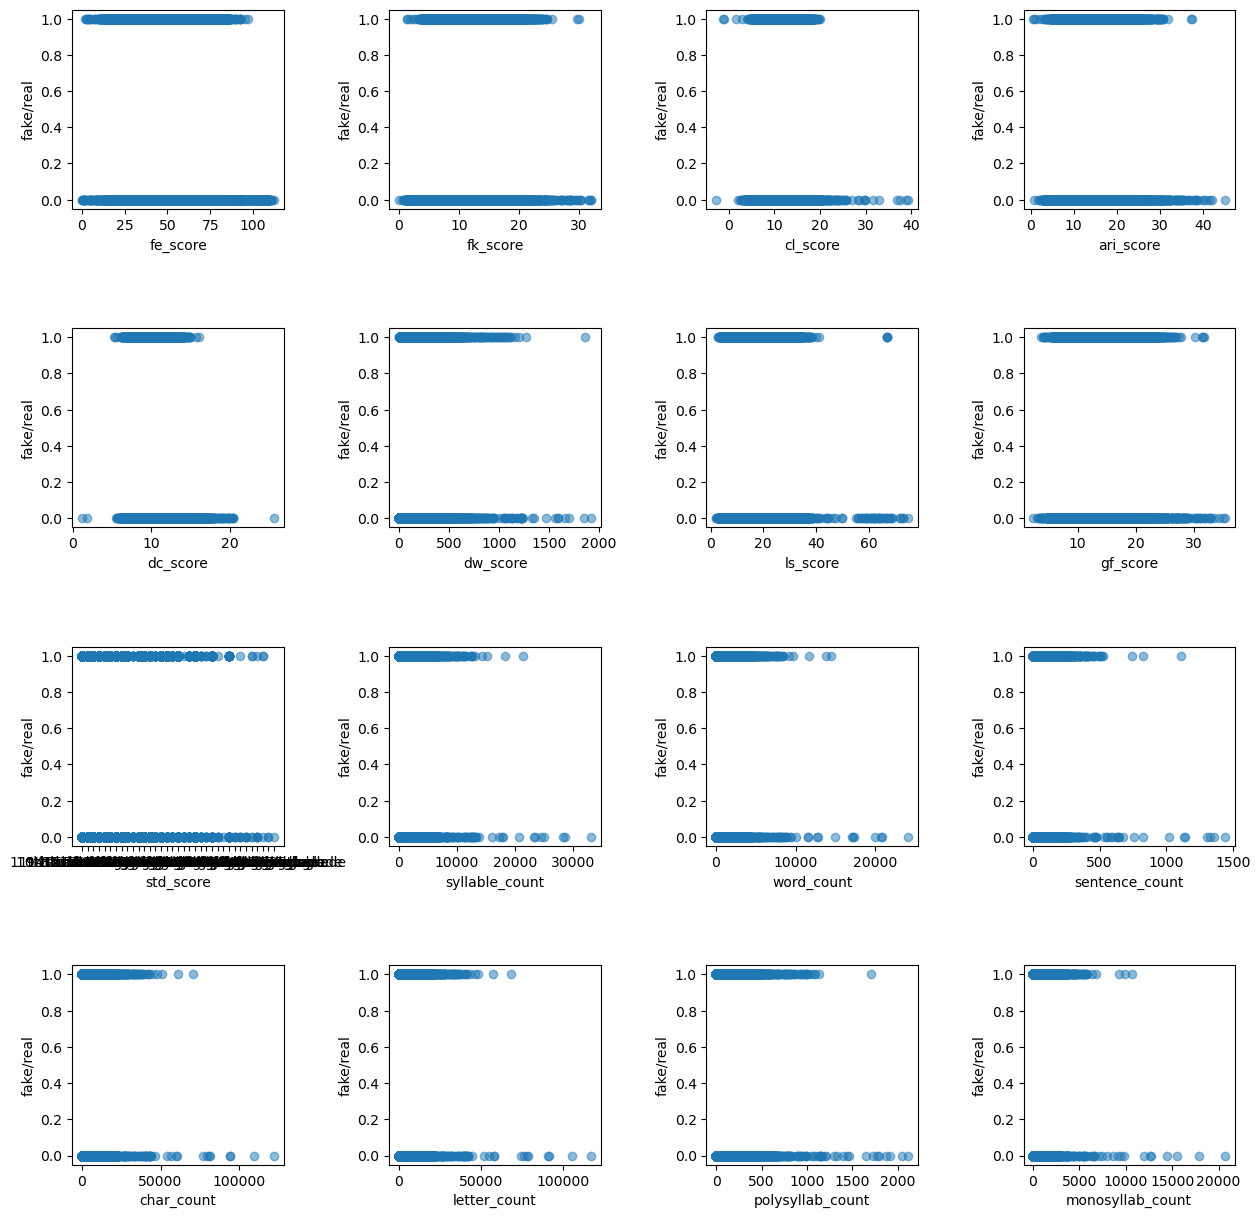

In [39]:
scatterplots(features, ncol=4, figsize=(15, 15))

In [40]:
'''
It seems that there is only a little difference between the means of readability scores between fake and real news
but there seems to be much greater variability in fake news compared to real. In particular cl_score, dc_score
, and ls_score may be predictive 
'''

'\nIt seems that there is only a little difference between the means of readability scores between fake and real news\nbut there seems to be much greater variability in fake news compared to real. In particular cl_score, dc_score\n, and ls_score may be predictive \n'

In [41]:
news_df.describe()

,real,fe_score,fk_score,cl_score,ari_score,dc_score,dw_score,ls_score,gf_score,syllable_count,word_count,sentence_count,char_count,letter_count,polysyllab_count,monosyllab_count,std_score_num
count,83339.000000,83339.000000,83339.000000,83339.000000,83339.000000,83339.000000,83339.000000,83339.000000,83339.000000,83339.000000,83339.000000,83339.000000,83339.000000,83339.000000,83339.000000,83339.000000,83339.000000
mean,0.658599,55.424318,10.856071,11.475457,13.368081,9.516123,92.005316,14.338805,12.341382,743.713088,489.310707,24.481311,2480.495338,2400.792006,64.746433,324.027814,11.491205
std,0.474182,11.222427,2.571266,1.906103,3.145683,1.129374,82.517960,4.995684,2.585619,802.210097,542.293418,30.176186,2695.264132,2598.252067,68.905574,376.571205,2.537848
min,0.000000,0.090000,0.000000,-2.770000,0.600000,1.180000,0.000000,2.117647,2.360000,49.000000,41.000000,1.000000,150.000000,147.000000,0.000000,17.000000,0.500000
25%,0.000000,48.540000,9.200000,10.320000,11.400000,8.800000,40.000000,11.166667,10.680000,304.000000,200.000000,9.000000,1018.000000,986.000000,25.000000,130.000000,9.500000
50%,1.000000,55.680000,10.700000,11.490000,13.200000,9.390000,74.000000,13.800000,12.150000,578.000000,379.000000,18.000000,1926.000000,1870.000000,49.000000,245.000000,11.500000
75%,1.000000,62.270000,12.300000,12.650000,15.100000,10.060000,116.000000,16.750000,13.700000,926.000000,604.000000,30.000000,3088.000000,2993.000000,82.000000,398.000000,12.500000
max,1.000000,112.290000,32.100000,39.360000,45.200000,25.690000,1922.000000,75.000000,35.410000,33075.000000,24135.000000,1442.000000,122086.000000,117178.000000,2115.000000,20722.000000,34.500000


In [42]:
news_df.to_pickle('News_df_scored')